In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from matplotlib import cm
from sklearn.feature_selection import SelectKBest
#from imblearn.under_sampling import NearMiss
from sklearn.metrics import  classification_report
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from adspy_shared_utilities import plot_decision_tree,plot_feature_importances,plot_class_regions_for_classifier_subplot
pd.set_option('display.max_columns',55)
plt.style.use('ggplot')

In [51]:
person1 = pd.read_csv('PAMAP2/Protocol/subject101.dat')
person2 = pd.read_csv('PAMAP2/Protocol/subject102.dat')
person3 = pd.read_csv('PAMAP2/Protocol/subject103.dat')
person4 = pd.read_csv('PAMAP2/Protocol/subject104.dat')
person5 = pd.read_csv('PAMAP2/Protocol/subject105.dat')
person6 = pd.read_csv('PAMAP2/Protocol/subject106.dat')
person7 = pd.read_csv('PAMAP2/Protocol/subject107.dat')
person8 = pd.read_csv('PAMAP2/Protocol/subject108.dat')

#### some data manipulation 
- putting the correct name for the feature
- changing the type of the feature from string to float
- storing the change in array of persons

In [52]:
persons = [person1, person2, person3, person4,
           person5, person6, person7, person8]

for i in range(len(persons)):
    persons[i] = persons[i]['compressed'].str.split(' ', expand=True)
    persons[i].columns = ['timestamp', 'activityID', 'heart_rate', 'IMU_hand_temperature', 'IMU_hand_accx_scale16', 'IMU_hand_accy_scale16', 'IMU_hand_accz_scale16', 'IMU_hand_accx_scale6', 'IMU_hand_accy_scale6', 'IMU_hand_accz_scale6', 'IMU_hand_gyroscopex', 'IMU_hand_gyroscopey', 'IMU_hand_gyroscopez', 'IMU_hand_magnetometerx', 'IMU_hand_magnetometery', 'IMU_hand_magnetometerz', 'IMU_hand_orientation1', 'IMU_hand_orientation2', 'IMU_hand_orientation3', 'IMU_hand_orientation4', 'IMU_chest_temperature', 'IMU_chest_accx_scale16', 'IMU_chest_accy_scale16', 'IMU_chest_accz_scale16', 'IMU_chest_accx_scale6', 'IMU_chest_accy_scale6', 'IMU_chest_accz_scale6', 'IMU_chest_gyroscopex',
                          'IMU_chest_gyroscopey', 'IMU_chest_gyroscopez', 'IMU_chest_magnetometerx', 'IMU_chest_magnetometery', 'IMU_chest_magnetometerz', 'IMU_chest_orientation1', 'IMU_chest_orientation2', 'IMU_chest_orientation3', 'IMU_chest_orientation4', 'IMU_ankle_temperature', 'IMU_ankle_accx_scale16', 'IMU_ankle_accy_scale16', 'IMU_ankle_accz_scale16', 'IMU_ankle_accx_scale6', 'IMU_ankle_accy_scale6', 'IMU_ankle_accz_scale6', 'IMU_ankle_gyroscopex', 'IMU_ankle_gyroscopey', 'IMU_ankle_gyroscopez', 'IMU_ankle_magnetometerx', 'IMU_ankle_magnetometery', 'IMU_ankle_magnetometerz', 'IMU_ankle_orientation1', 'IMU_ankle_orientation2', 'IMU_ankle_orientation3', 'IMU_ankle_orientation4']
    # -------------------------------------------------------------

    for j in persons[i].columns:
        persons[i][j] = persons[i][j].astype(float)


#### adding column include subject number

In [53]:
i=0
for person in persons:
    i+=1
    person['person'] = pd.Series([f"{i}" for x in range(len(person.index))])

##### checking the data

In [54]:
persons[1]

timestamp  activityID  heart_rate  IMU_hand_temperature  \
0            5.64         0.0         NaN                33.000   
1            5.65         0.0         NaN                33.000   
2            5.66         0.0       100.0                33.000   
3            5.67         0.0         NaN                33.000   
4            5.68         0.0         NaN                33.000   
...           ...         ...         ...                   ...   
446995    4475.59         0.0         NaN                29.125   
446996    4475.60         0.0         NaN                29.125   
446997    4475.61         0.0         NaN                29.125   
446998    4475.62         0.0         NaN                29.125   
446999    4475.63         0.0       134.0                29.125   

        IMU_hand_accx_scale16  IMU_hand_accy_scale16  IMU_hand_accz_scale16  \
0                    2.791430               7.553890               -7.06374   
1                    2.860860               7.438140               -7.21626   
2                    2.809970               7.094300               -7.52376   
3                    2.771380               6.980770               -7.52396   
4                    2.767100               7.131190               -7.67848   
...                       ...                    ...                    ...   
446995              -0.040828              -0.050765                9.77696   
446996              -0.004109              -0.013453                9.73890   
446997              -0.073003              -0.011192                9.93029   
446998               0.189650               0.099912                9.85688   
446999              -0.033339              -0.124631               10.00820   

        IMU_hand_accx_scale6  IMU_hand_accy_scale6  IMU_hand_accz_scale6  \
0                   2.875530              7.888230              -6.76139   
1                   2.842480              7.631640              -6.85140   
2                   2.793730              7.435450              -7.07744   
3                   2.806270              7.299290              -7.24326   
4                   2.787660              7.117970              -7.48445   
...                      ...                   ...                   ...   
446995             -0.007455              0.010854               9.76395   
446996             -0.067866             -0.018901               9.77918   
446997             -0.067358              0.041505               9.77905   
446998             -0.067233              0.026430               9.80928   
446999             -0.052037              0.026334               9.82437   

        IMU_hand_gyroscopex  IMU_hand_gyroscopey  IMU_hand_gyroscopez  \
0                  1.016400            -0.289410             1.382070   
1                  1.082690            -0.393965             1.609350   
2                  1.148290            -0.521087             1.807480   
3                  1.248880            -0.511985             1.950310   
4                  1.271780            -0.525704             2.013670   
...                     ...                  ...                  ...   
446995            -0.028116             0.001145             0.016620   
446996             0.010495             0.006091            -0.040373   
446997            -0.005155             0.028014            -0.023993   
446998            -0.012021             0.011733            -0.003718   
446999             0.020511             0.006414            -0.005136   

        IMU_hand_magnetometerx  IMU_hand_magnetometery  \
0                     -11.6508               -3.736830   
1                     -11.6575               -3.186480   
2                     -11.7615               -2.530610   
3                     -11.2109               -2.121300   
4                     -10.8648               -0.621037   
...                        ...                     ...   
446995                -22.2529               14.190200   


#### visual clarification for the null value 
- the heart rate sampling time is 9Hz while the IMU is 100Hz so there is alot of null value in the heart rate feature

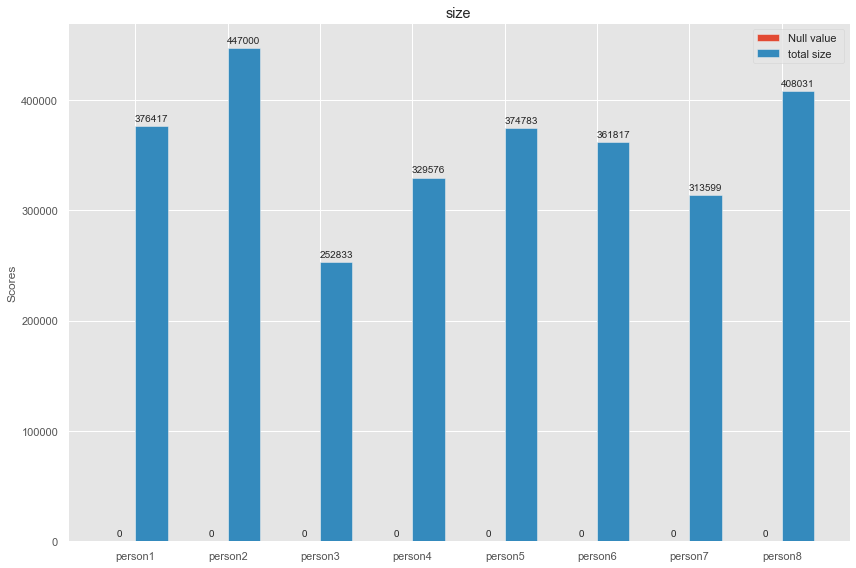

In [63]:
plt.rcParams["figure.figsize"] = (30,10)


labels = ['person1', 'person2', 'person3', 'person4','person5', 'person6', 'person7', 'person8']
null=[]
total_size=[]

for person in persons:
    null.append(person['heart_rate'].isna().sum())
    total_size.append(person.shape[0])




x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, null, width, label='Null value ')
rects2 = ax.bar(x + width/2, total_size, width, label='total size')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('size')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#### another clarification for the heart rate null value

In [7]:
for i in range(len(persons)):
    print(f"number of null in person {i} record:  ",persons[i]['heart_rate'].isna().sum(),"      the total size :   ",persons[i].shape[0]
    ,'     the non null :',persons[i].shape[0]-persons[i]['heart_rate'].isna().sum())

number of null in person 0 record:   342028       the total size :    376417      the non null : 34389
number of null in person 1 record:   406205       the total size :    447000      the non null : 40795
number of null in person 2 record:   229737       the total size :    252833      the non null : 23096
number of null in person 3 record:   299461       the total size :    329576      the non null : 30115
number of null in person 4 record:   340560       the total size :    374783      the non null : 34223
number of null in person 5 record:   328768       the total size :    361817      the non null : 33049
number of null in person 6 record:   284953       the total size :    313599      the non null : 28646
number of null in person 7 record:   370852       the total size :    408031      the non null : 37179


### solving the heart rate null value problem:
- if we drop the rows which contain null vlaue there will be 90% loss of the data which is n't efficient 
- we thought to interpolate it with non linear polynomial but but that will be non logical 
- `the best solution for is to interpolate is with linear polynomial for every person`

In [61]:
for i in range(len(persons)):
    persons[i]['heart_rate'].interpolate(method ='linear', limit_direction ='both',inplace=True)

##### checking the data

In [62]:
persons[1]

timestamp  activityID  heart_rate  IMU_hand_temperature  \
0            5.64         0.0       100.0                33.000   
1            5.65         0.0       100.0                33.000   
2            5.66         0.0       100.0                33.000   
3            5.67         0.0       100.0                33.000   
4            5.68         0.0       100.0                33.000   
...           ...         ...         ...                   ...   
446995    4475.59         0.0       134.0                29.125   
446996    4475.60         0.0       134.0                29.125   
446997    4475.61         0.0       134.0                29.125   
446998    4475.62         0.0       134.0                29.125   
446999    4475.63         0.0       134.0                29.125   

        IMU_hand_accx_scale16  IMU_hand_accy_scale16  IMU_hand_accz_scale16  \
0                    2.791430               7.553890               -7.06374   
1                    2.860860               7.438140               -7.21626   
2                    2.809970               7.094300               -7.52376   
3                    2.771380               6.980770               -7.52396   
4                    2.767100               7.131190               -7.67848   
...                       ...                    ...                    ...   
446995              -0.040828              -0.050765                9.77696   
446996              -0.004109              -0.013453                9.73890   
446997              -0.073003              -0.011192                9.93029   
446998               0.189650               0.099912                9.85688   
446999              -0.033339              -0.124631               10.00820   

        IMU_hand_accx_scale6  IMU_hand_accy_scale6  IMU_hand_accz_scale6  \
0                   2.875530              7.888230              -6.76139   
1                   2.842480              7.631640              -6.85140   
2                   2.793730              7.435450              -7.07744   
3                   2.806270              7.299290              -7.24326   
4                   2.787660              7.117970              -7.48445   
...                      ...                   ...                   ...   
446995             -0.007455              0.010854               9.76395   
446996             -0.067866             -0.018901               9.77918   
446997             -0.067358              0.041505               9.77905   
446998             -0.067233              0.026430               9.80928   
446999             -0.052037              0.026334               9.82437   

        IMU_hand_gyroscopex  IMU_hand_gyroscopey  IMU_hand_gyroscopez  \
0                  1.016400            -0.289410             1.382070   
1                  1.082690            -0.393965             1.609350   
2                  1.148290            -0.521087             1.807480   
3                  1.248880            -0.511985             1.950310   
4                  1.271780            -0.525704             2.013670   
...                     ...                  ...                  ...   
446995            -0.028116             0.001145             0.016620   
446996             0.010495             0.006091            -0.040373   
446997            -0.005155             0.028014            -0.023993   
446998            -0.012021             0.011733            -0.003718   
446999             0.020511             0.006414            -0.005136   

        IMU_hand_magnetometerx  IMU_hand_magnetometery  \
0                     -11.6508               -3.736830   
1                     -11.6575               -3.186480   
2                     -11.7615               -2.530610   
3                     -11.2109               -2.121300   
4                     -10.8648               -0.621037   
...                        ...                     ...   
446995                -22.2529               14.190200   


### splittng the data (in the next 2 blocks)
- we want the data to be n't bais to `specific person` or to `specific activity `
##### to solve the problem and to make the data to generlize for the population:
- first we splitted the train and test sample for every person independently and concatenate it so `every person has the same ratio in the training and testing data`.
- second n't only we splitted it for every person but also for every activity we splitted the train and test sample for it independently and concatenate it so `every activity  has the same ratio in the training and testing data`.

- we concatonate all that in datasets_train and datasets_test

In [10]:
lying_train=[]
sitting_train=[]
walking_train=[]
running_train=[]

lying_test=[]
sitting_test=[]
walking_test=[]
running_test=[]


datasets=persons[0]

filers=(datasets['activityID']==1) 
dataset0=datasets[filers]

#-------------------------------------------------------------
print("class ",1 ,dataset0.shape[0])
#-------------------------------------------------------------
datasets_train,datasets_test=train_test_split(dataset0,random_state=70)
#-------------------------------------------------------------
lying_train.append(datasets_train.shape[0]) # to visualize it later
lying_test.append(datasets_test.shape[0]) # to visualize it later

for i in [2,4,5]:
       

        filers=(datasets['activityID']==i) 
        dataset=datasets[filers]

        #-------------------------------------------------------------
        print("class ",i ,dataset.shape[0],)
        #-------------------------------------------------------------
        dataset_train,dataset_test=train_test_split(dataset,random_state=70)
        #-------------------------------------------------------------
       
        if i==2:
              sitting_train.append(dataset_train.shape[0]) 
              sitting_test.append(dataset_test.shape[0]) 
        elif i==4:
              walking_train.append(dataset_train.shape[0])
              walking_test.append(dataset_test.shape[0])
        else:
              running_train.append(dataset_train.shape[0]) 
              running_test.append(dataset_test.shape[0])
        #-------------------------------------------------------------
        datasets_train=pd.concat([datasets_train,dataset_train],ignore_index=True)
        datasets_test=pd.concat([datasets_test,dataset_test],ignore_index=True)



class  1 27187
class  2 23480
class  4 22253
class  5 21265


In [11]:
person=2
total_record=datasets_train.shape[0]+datasets_test.shape[0]
for i in range(1,8,1):
    dataset=persons[i]
    #-------------------------------------------------------------
    for i in [1,2,4,5]:

            filers=(dataset['activityID']==i) 
            dataset1=dataset[filers]

            #-------------------------------------------------------------
            total_record+=dataset1.shape[0]
            print('person: ',person,"  class: ",i ,'  size: ',dataset1.shape[0])
            #-------------------------------------------------------------
            if dataset1.shape[0]>1:
                dataset_train,dataset_test=train_test_split(dataset1,random_state=70)
            if i==1:
                lying_train.append(dataset_train.shape[0]) # to visualize it later
                lying_test.append(dataset_test.shape[0])
            elif i==2:
                sitting_train.append(dataset_train.shape[0]) 
                sitting_test.append(dataset_test.shape[0]) 
            elif i==4:
                walking_train.append(dataset_train.shape[0])
                walking_test.append(dataset_test.shape[0])
            else:
                running_train.append(dataset_train.shape[0]) 
                running_test.append(dataset_test.shape[0])
                #-------------------------------------------------------------
                
            datasets_train=pd.concat([datasets_train,dataset_train],ignore_index=True)
            datasets_test=pd.concat([datasets_test,dataset_test],ignore_index=True)
            
            datasets_train=shuffle(datasets_train,random_state=100)
            datasets_test=shuffle(datasets_test,random_state=100)
    
    person+=1
#-------------------------------------------------------------

print('total_record:',total_record)


person:  2   class:  1   size:  23430
person:  2   class:  2   size:  22345
person:  2   class:  4   size:  32533
person:  2   class:  5   size:  9238
person:  3   class:  1   size:  22044
person:  3   class:  2   size:  28761
person:  3   class:  4   size:  29036
person:  3   class:  5   size:  0
person:  4   class:  1   size:  23047
person:  4   class:  2   size:  25492
person:  4   class:  4   size:  31932
person:  4   class:  5   size:  1
person:  5   class:  1   size:  23699
person:  5   class:  2   size:  26864
person:  5   class:  4   size:  32033
person:  5   class:  5   size:  24646
person:  6   class:  1   size:  23340
person:  6   class:  2   size:  23041
person:  6   class:  4   size:  25721
person:  6   class:  5   size:  22825
person:  7   class:  1   size:  25611
person:  7   class:  2   size:  12282
person:  7   class:  4   size:  33720
person:  7   class:  5   size:  3692
person:  8   class:  1   size:  24165
person:  8   class:  2   size:  22923
person:  8   class:  4

### in the below 2 blocks we visualize the ratio of every person activity in the training and testing data compare to each other

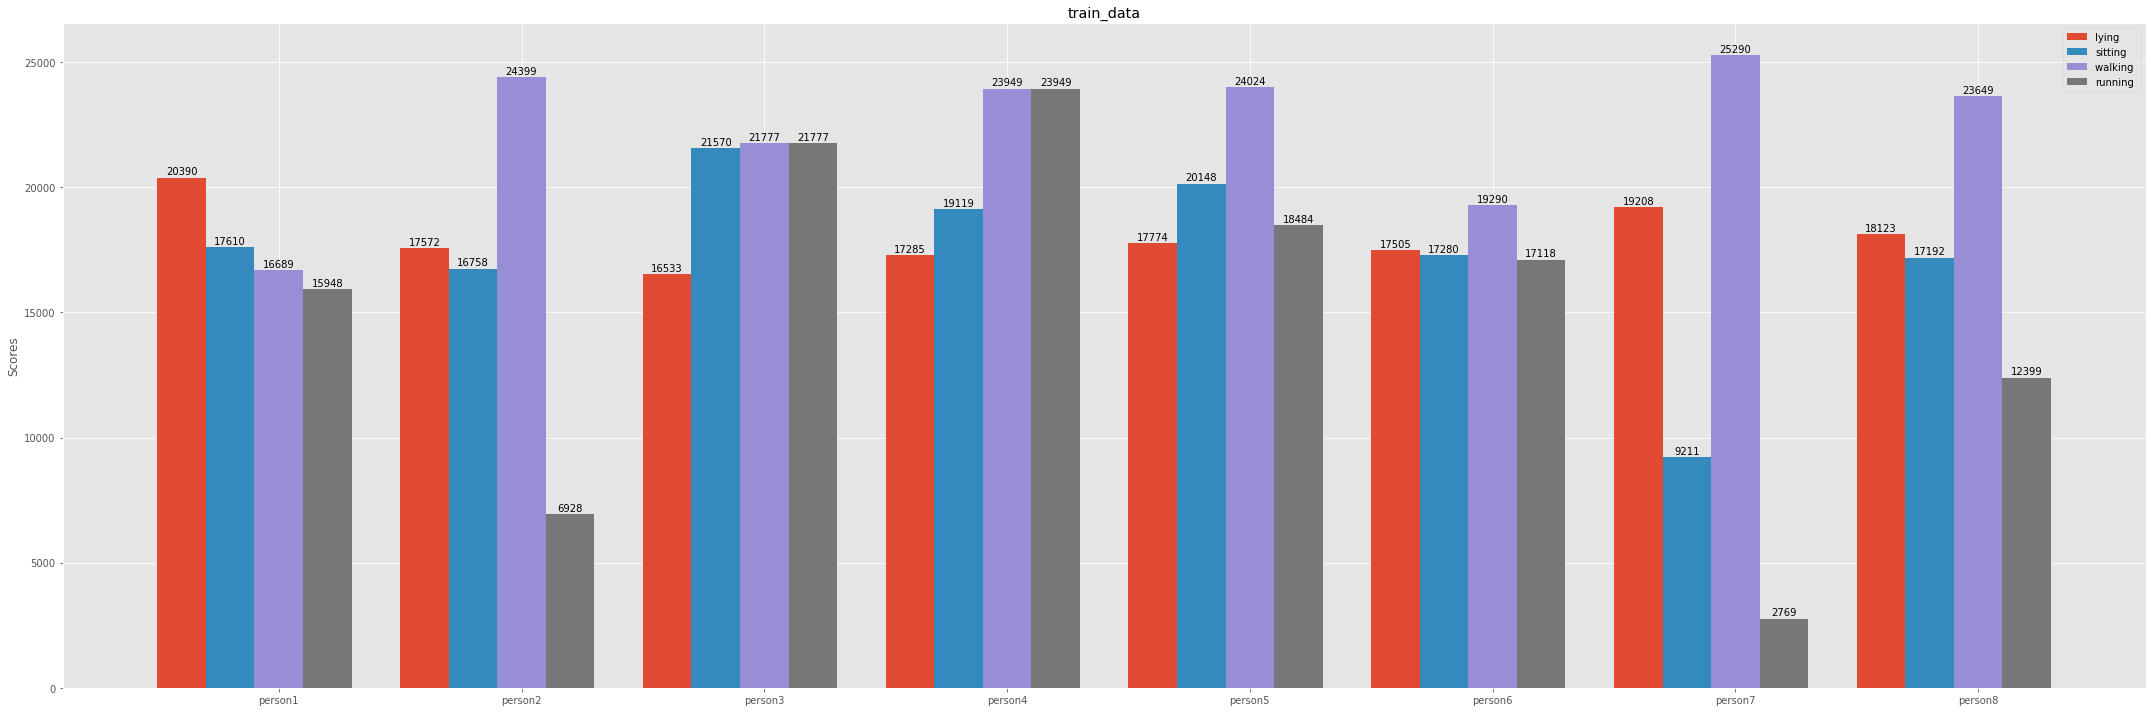

In [12]:
plt.rcParams["figure.figsize"] = (30,10)


labels = ['person1', 'person2', 'person3', 'person4','person5', 'person6', 'person7', 'person8']


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, lying_train, width, label='lying')
rects2 = ax.bar(x - width, sitting_train, width, label='sitting')
rects3 = ax.bar(x , walking_train, width, label='walking ')
rects4 = ax.bar(x + width, running_train, width, label='running')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('train_data')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
ax.bar_label(rects3, padding=1)
ax.bar_label(rects4, padding=1)
fig.tight_layout()

plt.show()

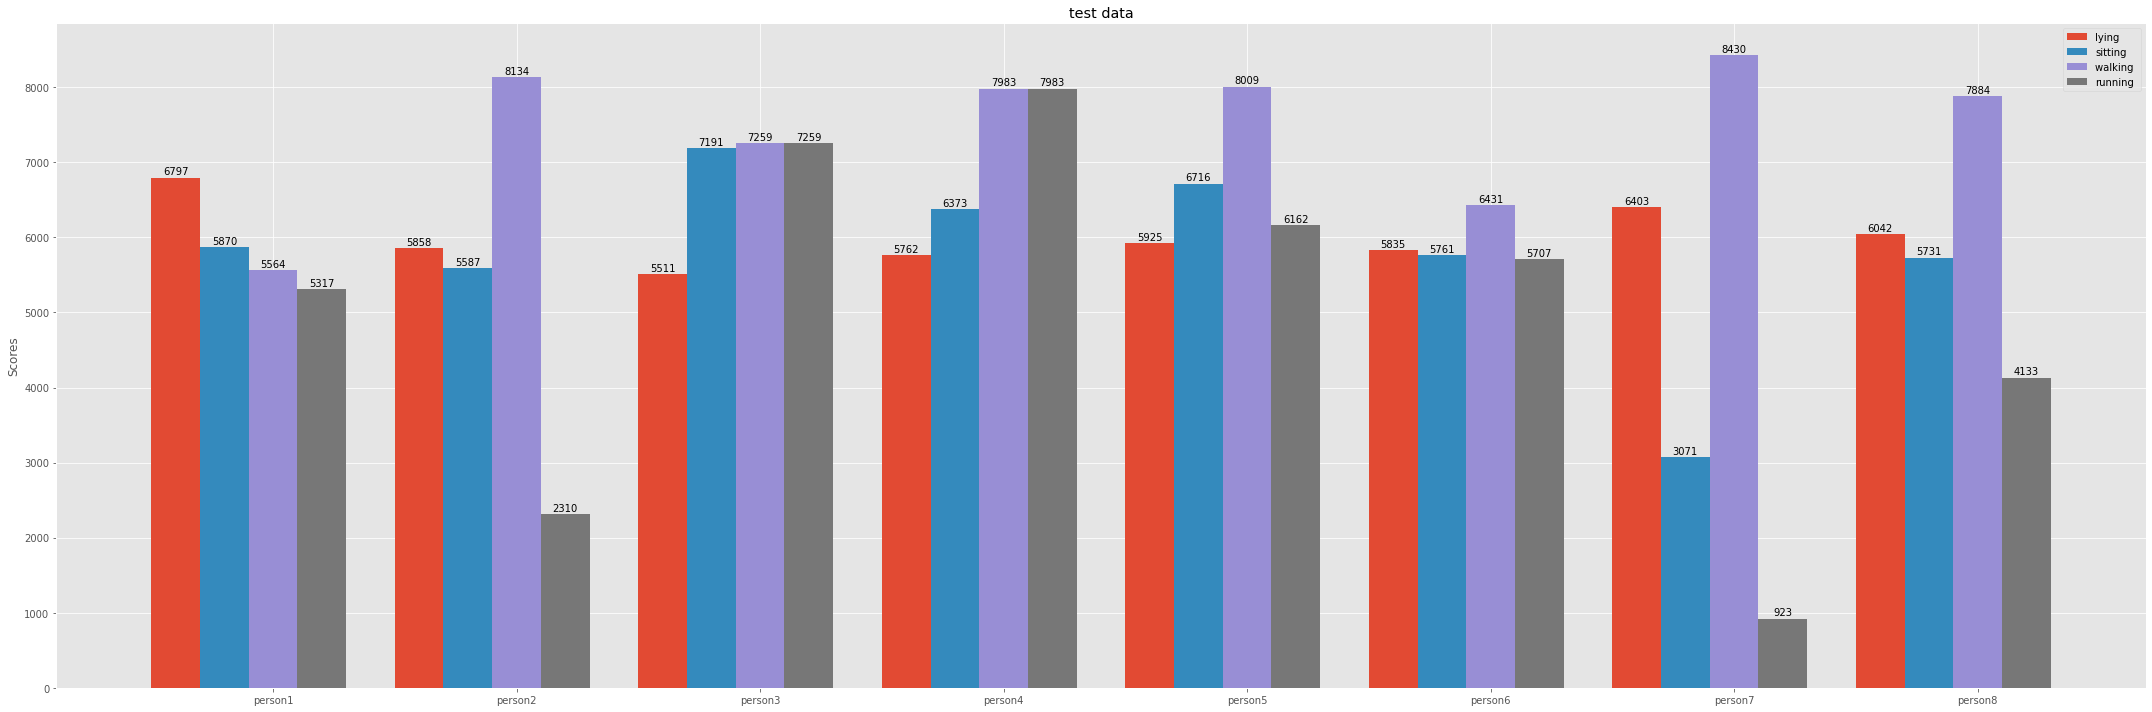

In [13]:
plt.rcParams["figure.figsize"] = (30,10)


labels = ['person1', 'person2', 'person3', 'person4','person5', 'person6', 'person7', 'person8']


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, lying_test, width, label='lying')
rects2 = ax.bar(x - width, sitting_test, width, label='sitting')
rects3 = ax.bar(x , walking_test, width, label='walking ')
rects4 = ax.bar(x + width, running_test, width, label='running')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('test data')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
ax.bar_label(rects3, padding=1)
ax.bar_label(rects4, padding=1)
fig.tight_layout()

plt.show()

### in the below 2 blocks we visualize the ratio of every activity in the training and testing data for all the persons

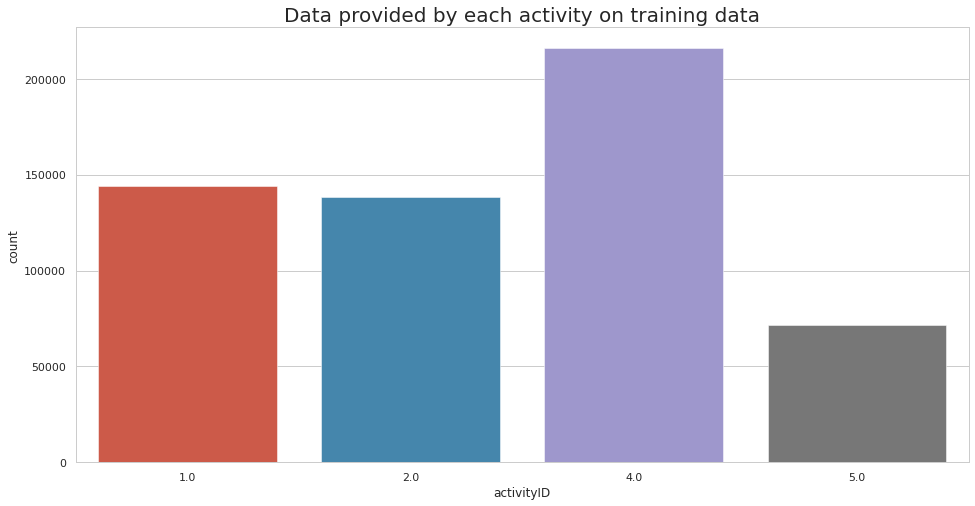

In [66]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each activity on training data', fontsize=20)
sns.countplot(x='activityID', data = datasets_train)
plt.show()

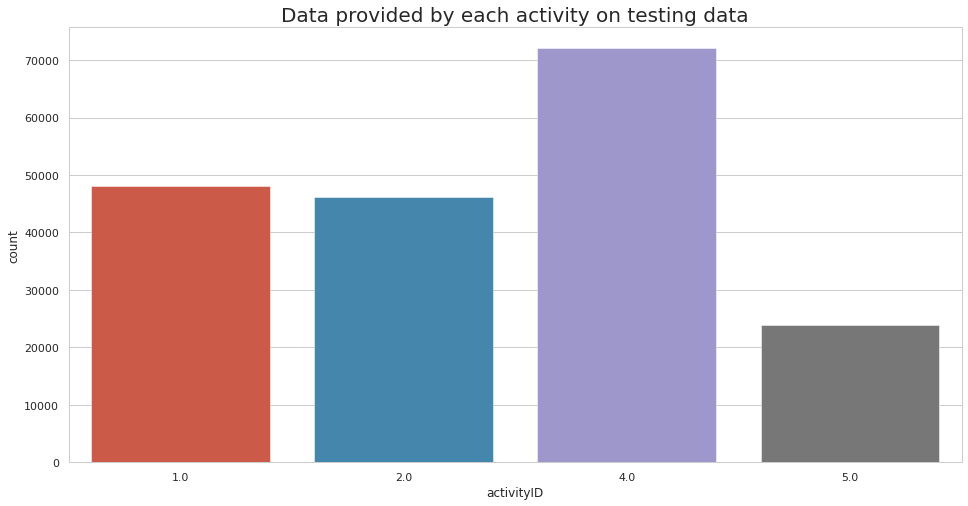

In [67]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each activity on testing data', fontsize=20)
sns.countplot(x='activityID', data = datasets_test)
plt.show()

#### we see here if there is any left null value in any feature:

<AxesSubplot:>

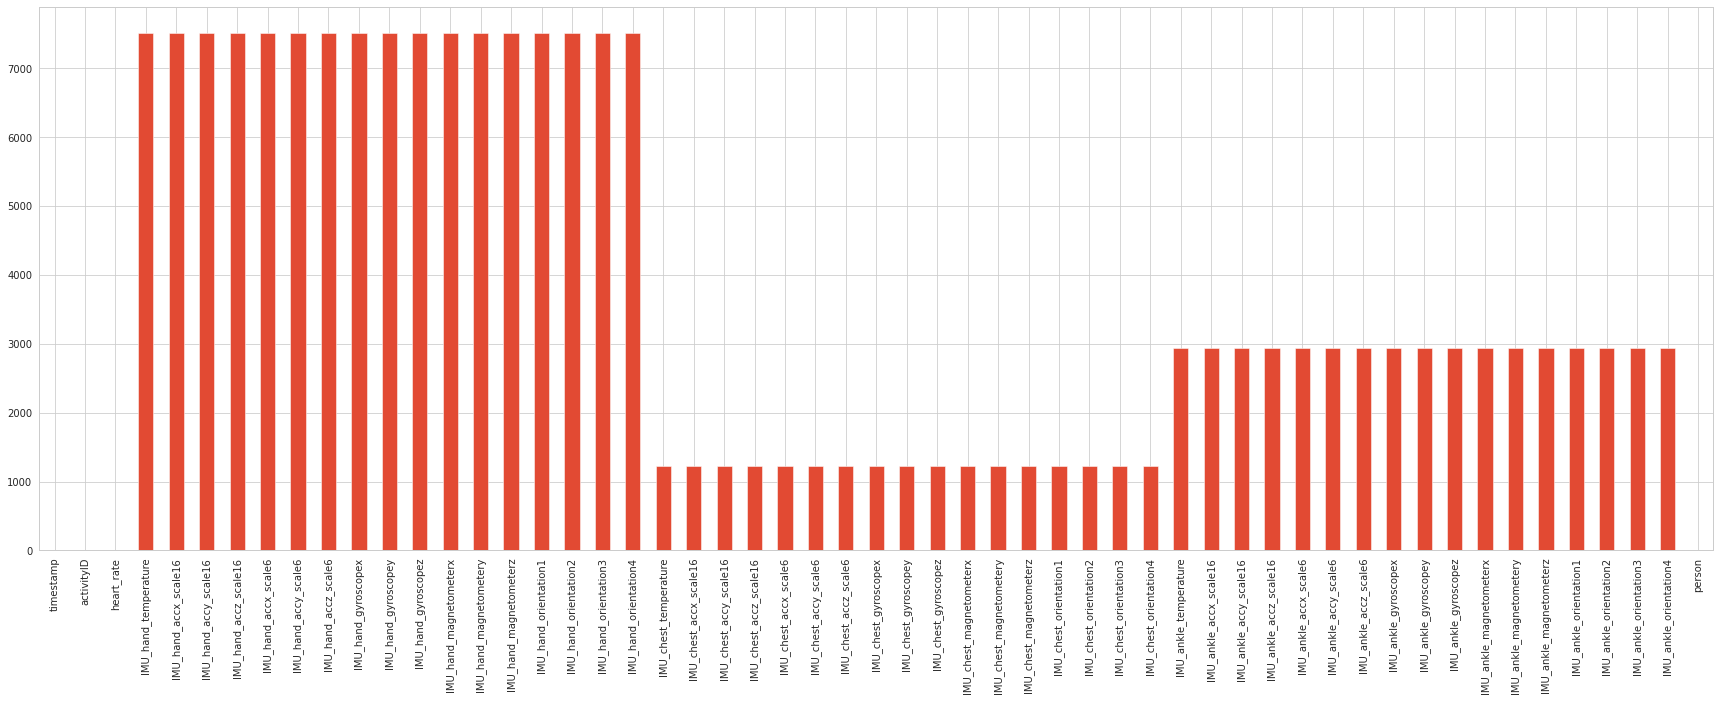

In [16]:
datasets_train.isna().sum().plot.bar()

#### from the above graph the null data feature is too small so it willn't affect if we drop it

In [17]:
for data in [datasets_train,datasets_test]:
    data.dropna(axis='rows',inplace=True)
    data.dropna(axis='rows',inplace=True)

##### IMU_orientation feature
- don't add anything to the data as it always 0 `so we drop it`


<AxesSubplot:>

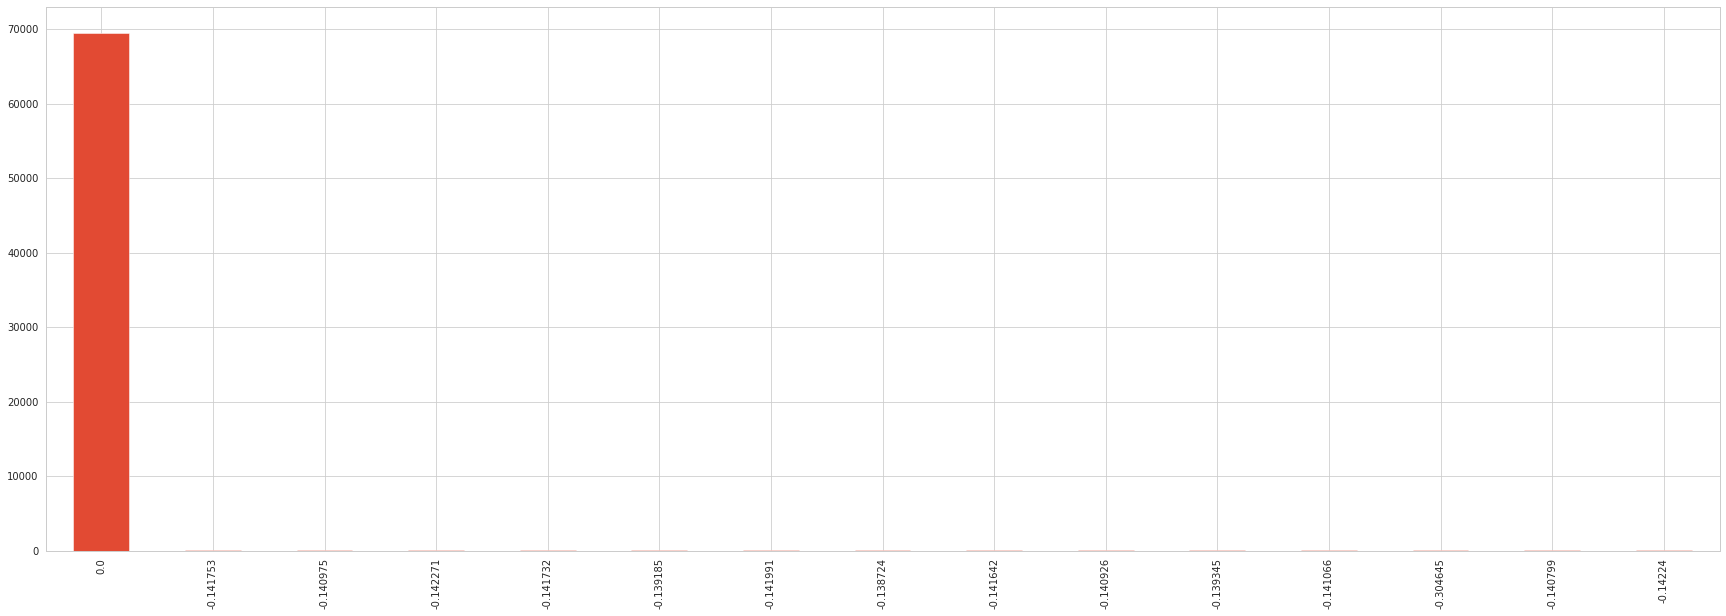

In [18]:
datasets_train['IMU_hand_orientation2'].value_counts().iloc[:15].plot.bar()

In [19]:
datasets_train['IMU_chest_orientation4'].value_counts()

 0.000000    69514
 0.173511       15
 0.173351       14
 0.150790       14
 0.174483       14
             ...  
 0.023186        1
-0.004412        1
 0.090770        1
 0.479460        1
 0.012058        1
Name: IMU_chest_orientation4, Length: 346920, dtype: int64

In [20]:
for data in [datasets_train, datasets_test]:
    data.drop('IMU_hand_orientation1', inplace=True, axis=1)
    data.drop('IMU_hand_orientation2', inplace=True, axis=1)
    data.drop('IMU_hand_orientation3', inplace=True, axis=1)
    data.drop('IMU_hand_orientation4', inplace=True, axis=1)

    data.drop('IMU_chest_orientation1', inplace=True, axis=1)
    data.drop('IMU_chest_orientation2', inplace=True, axis=1)
    data.drop('IMU_chest_orientation3', inplace=True, axis=1)
    data.drop('IMU_chest_orientation4', inplace=True, axis=1)

    data.drop('IMU_ankle_orientation1', inplace=True, axis=1)
    data.drop('IMU_ankle_orientation2', inplace=True, axis=1)
    data.drop('IMU_ankle_orientation3', inplace=True, axis=1)
    data.drop('IMU_ankle_orientation4', inplace=True, axis=1)

    data.drop('timestamp', inplace=True, axis=1)


### we shuffle all the data to randomize it for all the people :
- so the data will n't be bais to one person

In [21]:
for i in range(200):

    datasets_train=shuffle(datasets_train,random_state=100)
    datasets_test=shuffle(datasets_test,random_state=100)

    
#-------------------------------------------------------------
datasets_train= datasets_train[[c for c in datasets_train if c not in ['activityID']] + ['activityID']]
datasets_test= datasets_test[[c for c in datasets_test if c not in ['activityID']] + ['activityID']]

In [22]:
datasets_train

heart_rate  IMU_hand_temperature  IMU_hand_accx_scale16  \
10032        113.0               34.6250              -8.058770   
300620        78.0               34.3750              -2.006210   
509722        78.0               33.9375              -5.651540   
509174        87.0               31.1250               0.501824   
188904        72.0               31.9375               1.118750   
...            ...                   ...                    ...   
532723        60.0               31.0625               0.439910   
284493       175.0               28.0625              -6.176950   
126182       170.0               28.1875              11.566200   
226836       118.0               33.1875             -12.936400   
47295         64.0               33.5000               5.008080   

        IMU_hand_accy_scale16  IMU_hand_accz_scale16  IMU_hand_accx_scale6  \
10032                0.869532               3.842160             -8.977290   
300620              -9.412110               0.773054             -1.816420   
509722               5.119040               5.942200             -5.418730   
509174               5.809000               7.879440              0.418576   
188904               9.214710               3.181730              1.192230   
...                       ...                    ...                   ...   
532723               4.525350               8.537130              0.459279   
284493               7.754340              -1.040780             -7.489540   
126182              -4.430710               1.190480             11.509700   
226836               3.037090               4.339090            -13.866600   
47295               -0.368480               8.391140              5.191840   

        IMU_hand_accy_scale6  IMU_hand_accz_scale6  IMU_hand_gyroscopex  \
10032                1.26387              4.605920             1.558130   
300620              -9.43815              1.179060            -0.047402   
509722               5.12109              6.330420            -0.003518   
509174               5.76016              8.044530            -0.014975   
188904               9.16334              3.385250            -0.005373   
...                      ...                   ...                  ...   
532723               4.52214              8.756940             0.003733   
284493              11.27620             -0.627304            -3.162410   
126182              -5.26065              0.899569             1.965310   
226836               3.47450              5.255410             0.822079   
47295               -0.55646              8.476310             0.009670   

        IMU_hand_gyroscopey  IMU_hand_gyroscopez  IMU_hand_magnetometerx  \
10032              0.189324            -2.006310                40.06190   
300620            -0.013969            -0.003339                 7.90150   
509722             0.022949            -0.056724                12.77780   
509174             0.004657            -0.015684               -32.03810   
188904             0.009388            -0.002036                -1.70449   
...                     ...                  ...                     ...   
532723             0.020271            -0.007415                -5.39229   
284493             4.442160             5.492780                 4.65820   
126182            -3.286890            -0.097749                13.85420   
226836             0.710287            -4.901140                70.57360   
47295              0.016123            -0.009978                13.19810   

        IMU_hand_magnetometery  IMU_hand_magnetometerz  IMU_chest_temperature  \
10032                 -29.3094               -14.56590                38.2500   
300620                 23.6593               -14.55950                37.6250   
509722                -23.1937               -21.50470                37.3750   
509174                 16.8466               -38.96080                32.9375   
188904                -20.8041               -1

### from the below scatter matrix we deduce that:
- heart rate is seperating the data well

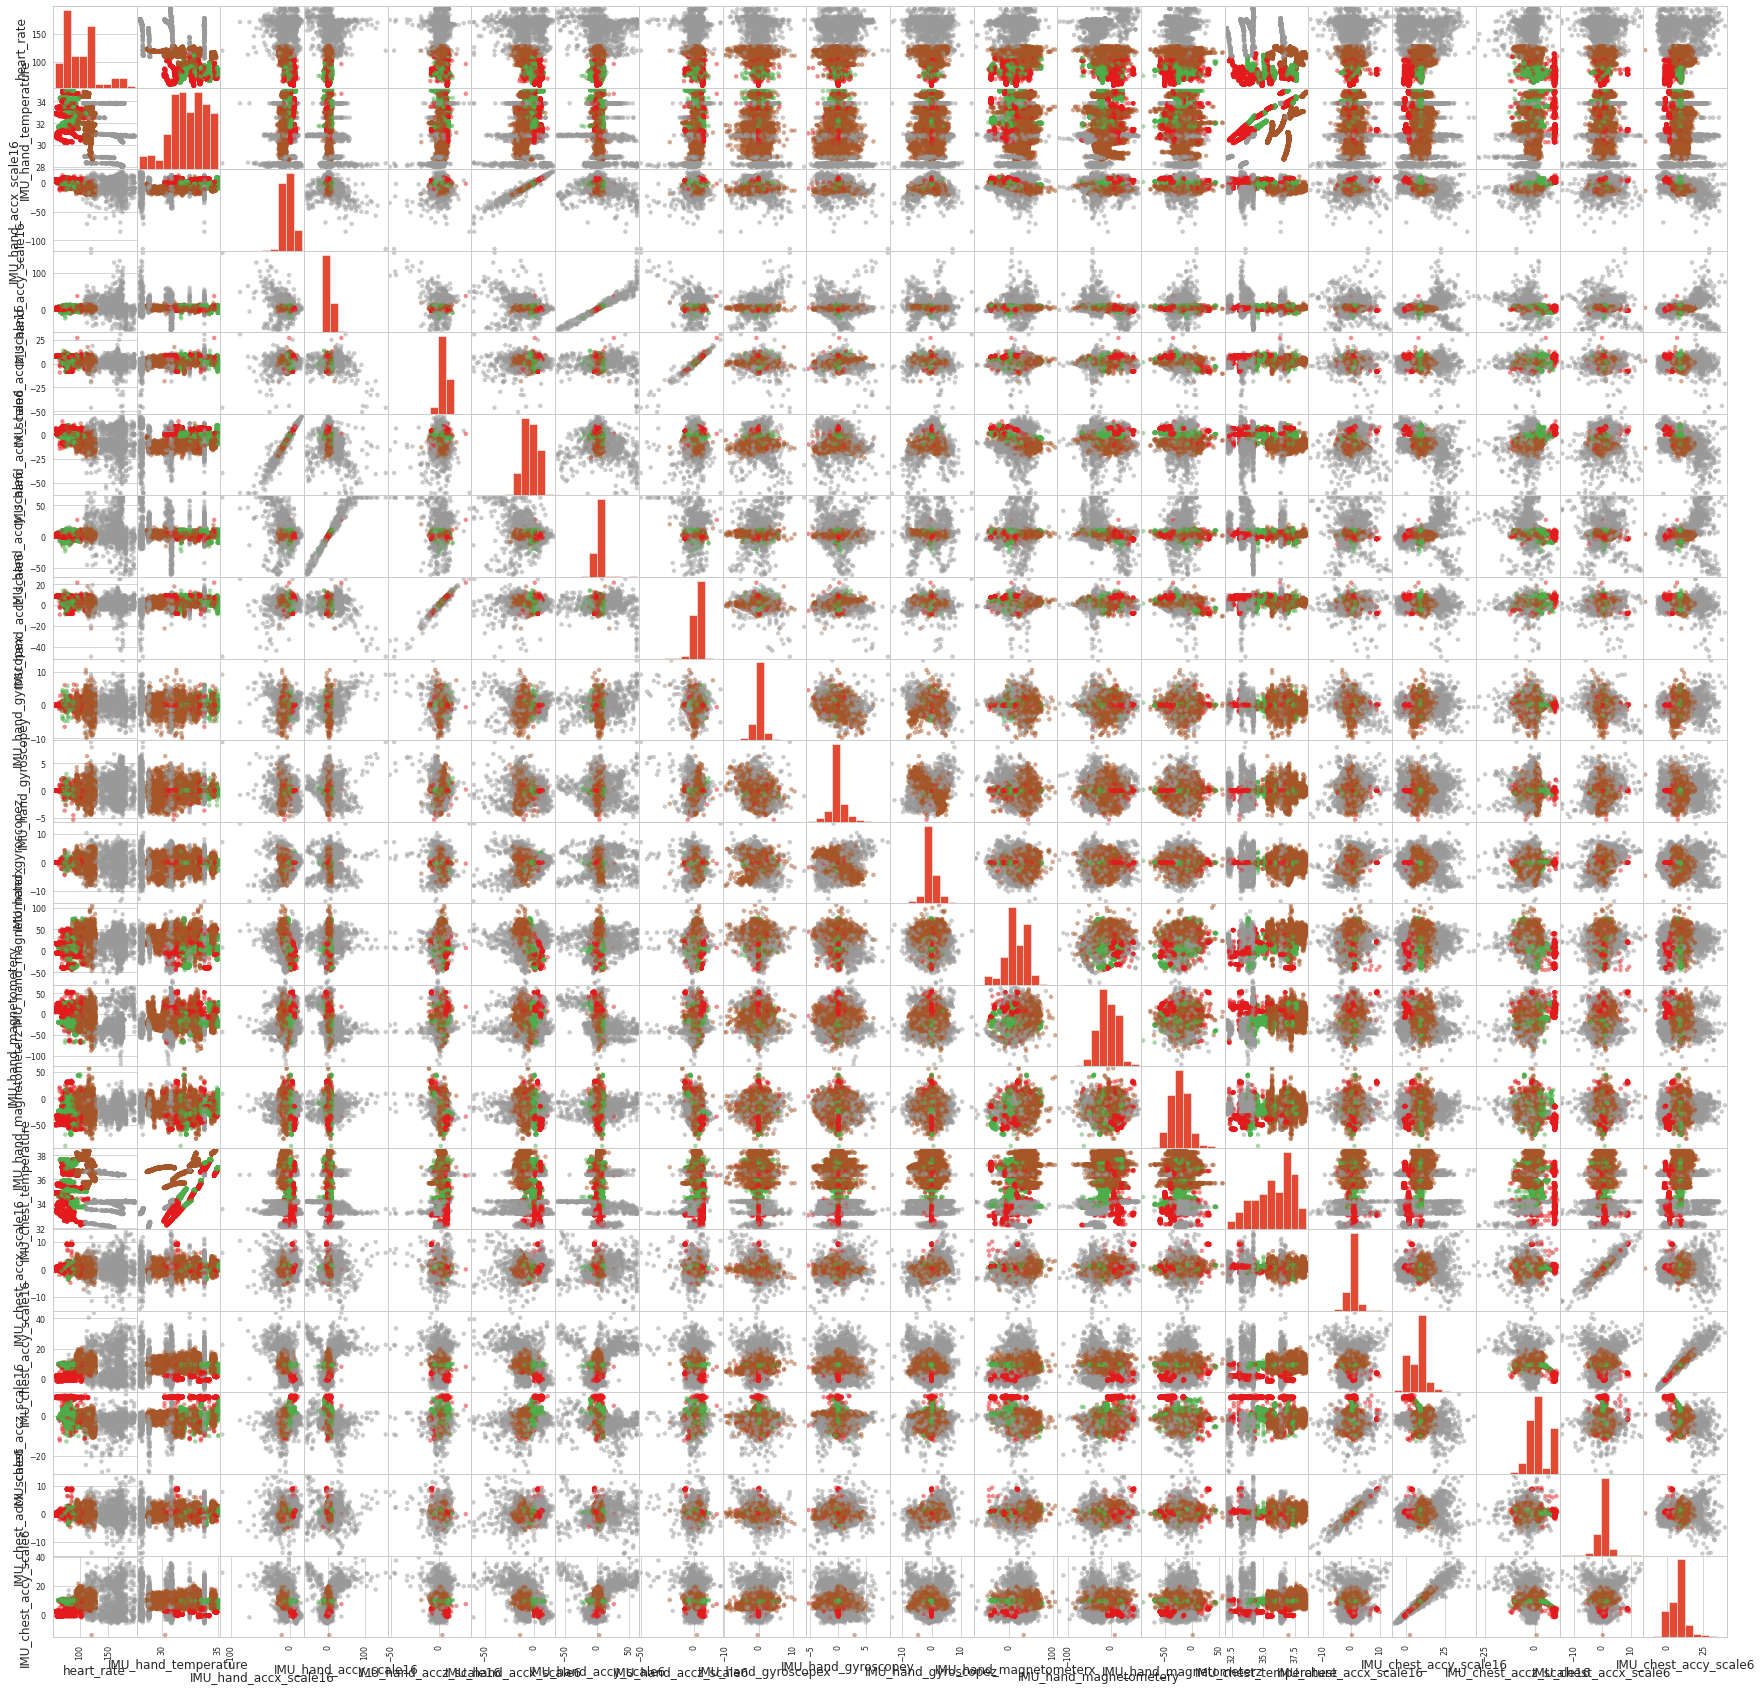

In [23]:
cmap=cm.get_cmap('Set1')
y=datasets_train.iloc[:10000,-1]
x=datasets_train.iloc[:10000,:-2]
# print(x.shape,y.shape)
scatter=pd.plotting.scatter_matrix( x.iloc[:,0:20], c=y ,marker='o',s=20,figsize=(30,30),cmap=cmap)



### deduction from the below heatmap:
- we see that the correlation between `IMU_acc_scale16` is almost 1 with `IMU_acc_scale6`.
- from the `activity id` column we deduce that the best feature is heart rate.
- we see that the correlation between `IMU_chest_magnetometery` is almost 0.7 with `IMU_chest_magnetometerx` and `IMU_chest_accz_scale16`.


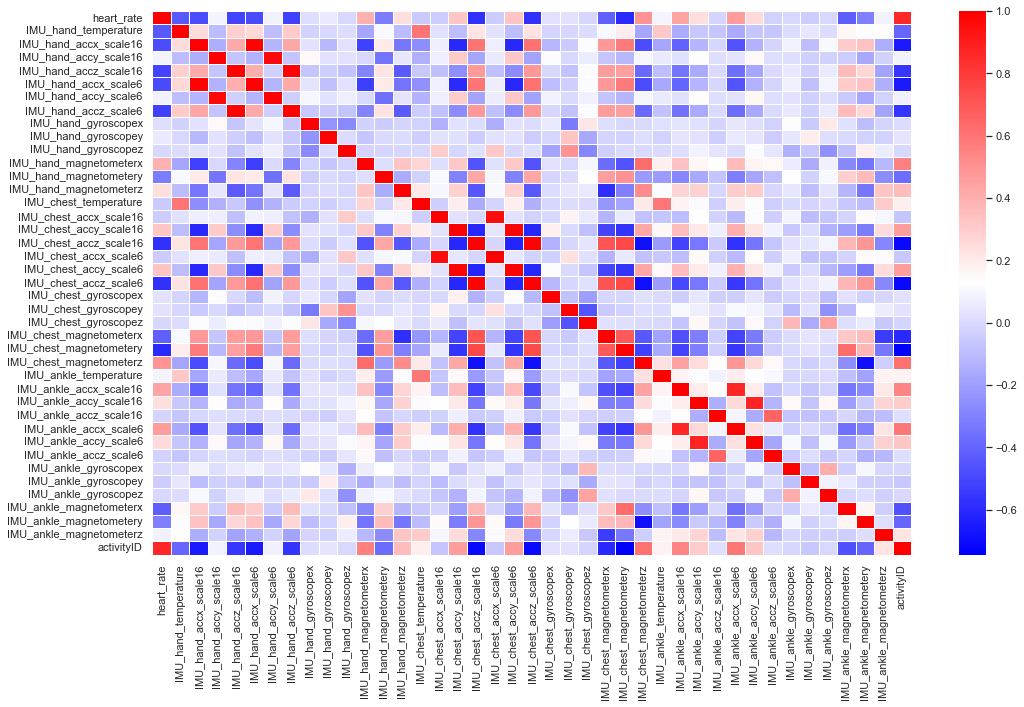

In [24]:
corr = datasets_train.corr()
# the heat map of the corrlations Better visualization
sns.set(rc={'figure.figsize': (17, 10)})
dataplot = sns.heatmap(corr, cmap="bwr", linewidths=.5)

#### so we drop all the the feature which won't add more info for the model

In [25]:


for data in [datasets_train,datasets_test]:
    data.drop('IMU_hand_accx_scale6', inplace=True, axis=1)
    data.drop('IMU_hand_accy_scale6', inplace=True, axis=1)
    data.drop('IMU_hand_accz_scale6', inplace=True, axis=1)

    data.drop('IMU_chest_accx_scale6', inplace=True, axis=1)
    data.drop('IMU_chest_accy_scale6', inplace=True, axis=1)
    data.drop('IMU_chest_accz_scale6', inplace=True, axis=1)
    
    data.drop('IMU_ankle_accx_scale6', inplace=True, axis=1)
    data.drop('IMU_ankle_accy_scale6', inplace=True, axis=1)
    data.drop('IMU_ankle_accz_scale6', inplace=True, axis=1)

    data.drop('IMU_chest_magnetometerx', inplace=True, axis=1)
    data.drop('IMU_chest_magnetometery', inplace=True, axis=1)


In [26]:
datasets_train

heart_rate  IMU_hand_temperature  IMU_hand_accx_scale16  \
10032        113.0               34.6250              -8.058770   
300620        78.0               34.3750              -2.006210   
509722        78.0               33.9375              -5.651540   
509174        87.0               31.1250               0.501824   
188904        72.0               31.9375               1.118750   
...            ...                   ...                    ...   
532723        60.0               31.0625               0.439910   
284493       175.0               28.0625              -6.176950   
126182       170.0               28.1875              11.566200   
226836       118.0               33.1875             -12.936400   
47295         64.0               33.5000               5.008080   

        IMU_hand_accy_scale16  IMU_hand_accz_scale16  IMU_hand_gyroscopex  \
10032                0.869532               3.842160             1.558130   
300620              -9.412110               0.773054            -0.047402   
509722               5.119040               5.942200            -0.003518   
509174               5.809000               7.879440            -0.014975   
188904               9.214710               3.181730            -0.005373   
...                       ...                    ...                  ...   
532723               4.525350               8.537130             0.003733   
284493               7.754340              -1.040780            -3.162410   
126182              -4.430710               1.190480             1.965310   
226836               3.037090               4.339090             0.822079   
47295               -0.368480               8.391140             0.009670   

        IMU_hand_gyroscopey  IMU_hand_gyroscopez  IMU_hand_magnetometerx  \
10032              0.189324            -2.006310                40.06190   
300620            -0.013969            -0.003339                 7.90150   
509722             0.022949            -0.056724                12.77780   
509174             0.004657            -0.015684               -32.03810   
188904             0.009388            -0.002036                -1.70449   
...                     ...                  ...                     ...   
532723             0.020271            -0.007415                -5.39229   
284493             4.442160             5.492780                 4.65820   
126182            -3.286890            -0.097749                13.85420   
226836             0.710287            -4.901140                70.57360   
47295              0.016123            -0.009978                13.19810   

        IMU_hand_magnetometery  IMU_hand_magnetometerz  IMU_chest_temperature  \
10032                 -29.3094               -14.56590                38.2500   
300620                 23.6593               -14.55950                37.6250   
509722                -23.1937               -21.50470                37.3750   
509174                 16.8466               -38.96080                32.9375   
188904                -20.8041               -15.06380                34.9375   
...                        ...                     ...                    ...   
532723                 16.6622               -33.25630                33.8750   
284493                -57.3475               -44.77000                33.1875   
126182                -44.2858                -6.54803                33.2500   
226836                 17.7239                -3.09329                37.2500   
47295                  24.2282               -39.63900                35.6250   

        IMU_chest_accx_scale16  IMU_chest_accy_scale16  \
10032                 1.165080                 7.66375   
300620                0.145695                10.03990   
509722                0.141681                 9.37301   
509174                0.775453                 2.04204   
188904                0.407677                 9.37813   
...                        ...              

### we draw the heat map again to see it after cleaning

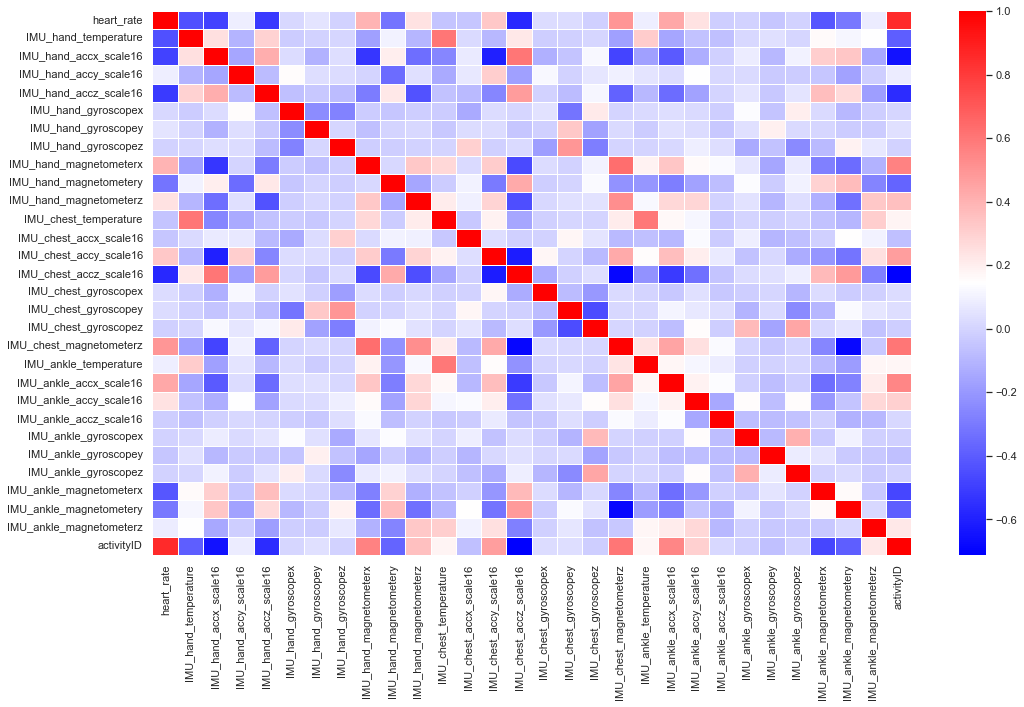

In [27]:
corr = datasets_train.corr()
# the heat map of the corrlations Better visualization
sns.set(rc={'figure.figsize': (17, 10)})
dataplot = sns.heatmap(corr, cmap="bwr", linewidths=.5)

## feature selection using SelectKBest:

##### from the below dataframe we see that the best 4 feature is:

- heart rate 
- IMU chest accelerometer in z direction 
- IMU hand accelerometer in x direction
- IMU hand_magnetometer in x direction


##### `so we can put our model in smart watch and the accuracy will n't be that bad` 

In [69]:
data_x=datasets_train.iloc[:,:-2]
data_y=datasets_train.iloc[:,-1]

fit_feature = SelectKBest()
fit_feature.fit(data_x, data_y)
score_col = pd.DataFrame(fit_feature.scores_, columns=['score_value'])
name_col = pd.DataFrame(data_x.columns,columns=['feature_name'])
top_feature = pd.concat([name_col, score_col], axis=1).nlargest( 31,'score_value')


top_feature['score_value']=top_feature['score_value']/top_feature['score_value'].sum()

top_feature

feature_name  score_value
0                heart_rate     0.375794
14   IMU_chest_accz_scale16     0.145659
2     IMU_hand_accx_scale16     0.073358
8    IMU_hand_magnetometerx     0.061212
18  IMU_chest_magnetometerz     0.051328
13   IMU_chest_accy_scale16     0.043507
20   IMU_ankle_accx_scale16     0.040198
11    IMU_chest_temperature     0.037406
4     IMU_hand_accz_scale16     0.032929
9    IMU_hand_magnetometery     0.023353
26  IMU_ankle_magnetometerx     0.022159
1      IMU_hand_temperature     0.019721
28  IMU_ankle_magnetometerz     0.017979
27  IMU_ankle_magnetometery     0.016930
10   IMU_hand_magnetometerz     0.014084
21   IMU_ankle_accy_scale16     0.009909
19    IMU_ankle_temperature     0.009399
3     IMU_hand_accy_scale16     0.002625
22   IMU_ankle_accz_scale16     0.000712
6       IMU_hand_gyroscopey     0.000563
12   IMU_chest_accx_scale16     0.000429
24     IMU_ankle_gyroscopey     0.000378
15     IMU_chest_gyroscopex     0.000115
16     IMU_chest_gyroscopey     0.000102
5       IMU_hand_gyroscopex     0.000094
17     IMU_chest_gyroscopez     0.000035
23     IMU_ankle_gyroscopex     0.000011
7       IMU_hand_gyroscopez     0.000006
25     IMU_ankle_gyroscopez     0.000005

In [29]:
best_feature_name=np.array(top_feature.iloc[:16,0])
best_feature_name

array(['heart_rate', 'IMU_chest_accz_scale16', 'IMU_hand_accx_scale16',
       'IMU_hand_magnetometerx', 'IMU_chest_magnetometerz',
       'IMU_chest_accy_scale16', 'IMU_ankle_accx_scale16',
       'IMU_chest_temperature', 'IMU_hand_accz_scale16',
       'IMU_hand_magnetometery', 'IMU_ankle_magnetometerx',
       'IMU_hand_temperature', 'IMU_ankle_magnetometerz',
       'IMU_ankle_magnetometery', 'IMU_hand_magnetometerz',
       'IMU_ankle_accy_scale16'], dtype=object)

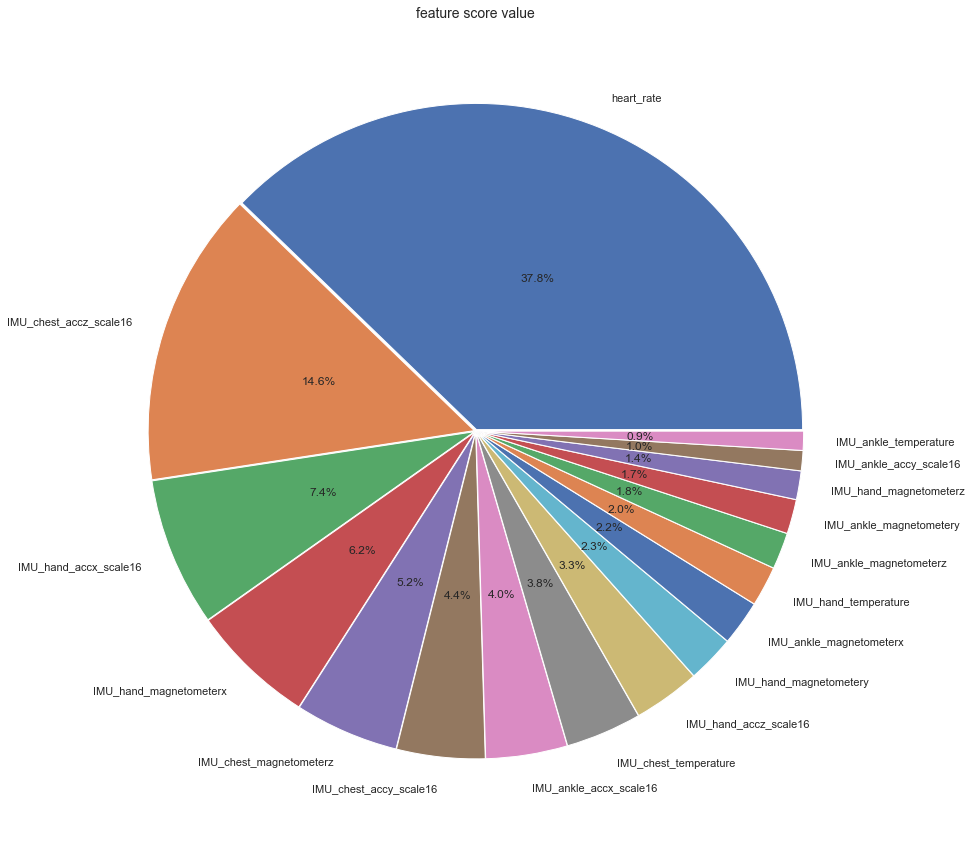

In [30]:
pie, ax = plt.subplots(figsize=[15,15])
plt.pie(x=top_feature.iloc[:17,1], autopct="%.1f%%", explode=[0.005]*len(top_feature.iloc[:17,1]), labels=top_feature.iloc[:17,0], pctdistance=0.5)
plt.title("feature score value", fontsize=14);

plt.show()

### the classes in the data are imbalanced

In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

Imbalanced Data Handling Techniques: There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.

- SMOTE
- Near Miss Algorithm


- `i will do undersampling manualy as the data describe the population well`

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [31]:
index0=[]

walking_indx=datasets_train[datasets_train['activityID']==4].index
index0.append(walking_indx[walking_indx<345000])

sitting_indx=datasets_train[datasets_train['activityID']==2].index
index0.append(sitting_indx[sitting_indx<240000])

laying_indx=datasets_train[datasets_train['activityID']==1].index
index0.append(laying_indx[laying_indx<228000])

# for i in index0:
#     print(i.shape)

balanced_datasets_train=datasets_train.copy()


for i in range(3):

    balanced_datasets_train.drop(datasets_train.loc[index0[i],:].index,axis=0,inplace=True)

#--------------------------------------------------------------------------
index1=[]

walking_indx=datasets_test[datasets_test['activityID']==4].index
index1.append(walking_indx[walking_indx<105000])

sitting_indx=datasets_test[datasets_test['activityID']==2].index
index1.append(sitting_indx[sitting_indx<79000])

laying_indx=datasets_test[datasets_test['activityID']==1].index
index1.append(laying_indx[laying_indx<75000])

# for i in index1:
#     print(i.shape)

balanced_datasets_test=datasets_test.copy()


for i in range(3):

    balanced_datasets_test.drop(datasets_test.loc[index1[i],:].index,axis=0,inplace=True)



#### visualize the data after balancing :

Text(0.5, 0, 'balanced_datasets_test')

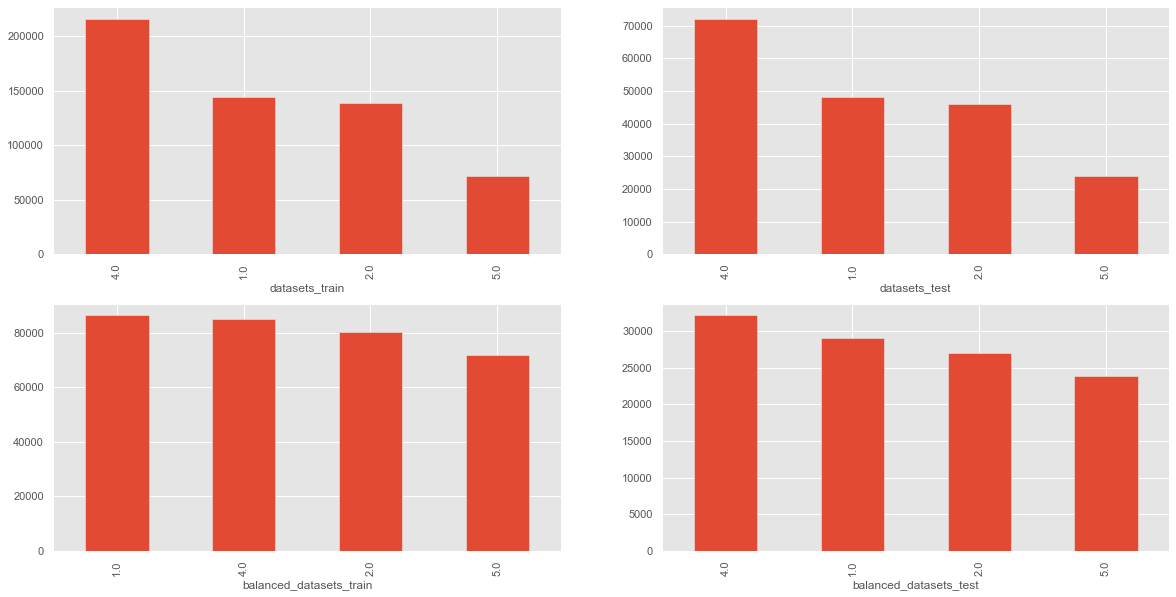

In [32]:
# plt.rcParams["figure.figsize"] = (10,10)
plt.style.use('ggplot')
fig, axes = plt.subplots(2,2, figsize=(20, 10))

datasets_train['activityID'].value_counts().plot(ax=axes[0,0], kind='bar', grid=True)
datasets_test['activityID'].value_counts().plot(ax=axes[0,1], kind='bar', grid=True)
balanced_datasets_train['activityID'].value_counts().plot(ax=axes[1,0], kind='bar', grid=True)
balanced_datasets_test['activityID'].value_counts().plot(ax=axes[1,1], kind='bar', grid=True)
#------------------------------------------------------------------------
axes[0,0].set_xlabel('datasets_train')
axes[0,1].set_xlabel('datasets_test')
axes[1,0].set_xlabel('balanced_datasets_train')
axes[1,1].set_xlabel('balanced_datasets_test')

In [33]:
print('datasets_train:',datasets_train.shape[0],'            datasets_test:',datasets_test.shape[0],'           percentage:',datasets_test.shape[0]/datasets_train.shape[0])
print('balanced_datasets_train:',balanced_datasets_train.shape[0],'   balanced_datasets_test:',balanced_datasets_test.shape[0],'    percentage:',balanced_datasets_test.shape[0]/balanced_datasets_train.shape[0])


datasets_train: 570399             datasets_test: 190208            percentage: 0.3334648202398672
balanced_datasets_train: 323380    balanced_datasets_test: 112086     percentage: 0.3466077061042736


### visualizing the subjects ratio before and after the balancing:

Text(0.5, 0, 'balanced_datasets_test')

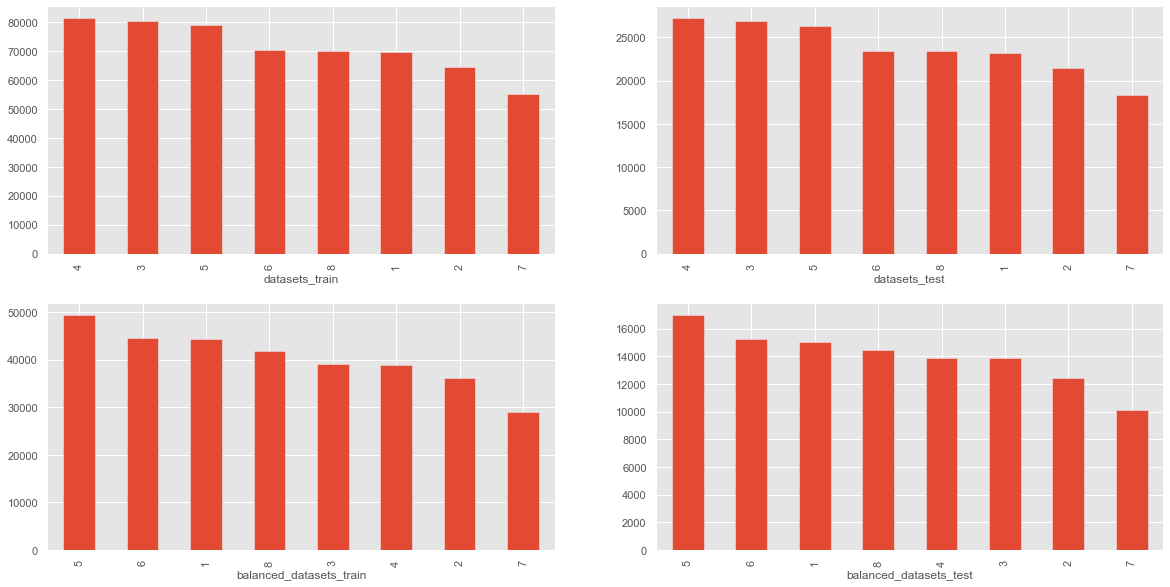

In [34]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2,2, figsize=(20, 10))

datasets_train['person'].value_counts().plot(ax=axes[0,0], kind='bar', grid=True)
datasets_test['person'].value_counts().plot(ax=axes[0,1], kind='bar', grid=True)
balanced_datasets_train['person'].value_counts().plot(ax=axes[1,0], kind='bar', grid=True)
balanced_datasets_test['person'].value_counts().plot(ax=axes[1,1], kind='bar', grid=True)
#------------------------------------------------------------------------
axes[0,0].set_xlabel('datasets_train')
axes[0,1].set_xlabel('datasets_test')
axes[1,0].set_xlabel('balanced_datasets_train')
axes[1,1].set_xlabel('balanced_datasets_test')

### shuffling the balanced data to generlize it more

In [35]:
for i in range(200):

    balanced_datasets_train=shuffle(balanced_datasets_train,random_state=100)
    balanced_datasets_test=shuffle(balanced_datasets_test,random_state=100)

#### here we are making mini version which is representing the data to help speeding the model

In [36]:
mini_datasets_train=balanced_datasets_train.iloc[5000:15000,:]
# mini_datasets_train.drop(balanced_datasets_train.loc[balanced_datasets_train.index<315000].index,axis=0,inplace=True)
mini_datasets_test=balanced_datasets_test.iloc[2000:5300,:]
# mini_datasets_test.drop(balanced_datasets_test.loc[balanced_datasets_test.index<116000].index,axis=0,inplace=True)

### in the below to block we visualising the mini data and to check if it's indeed representing the data

Text(0.5, 0, 'mini_datasets_test')

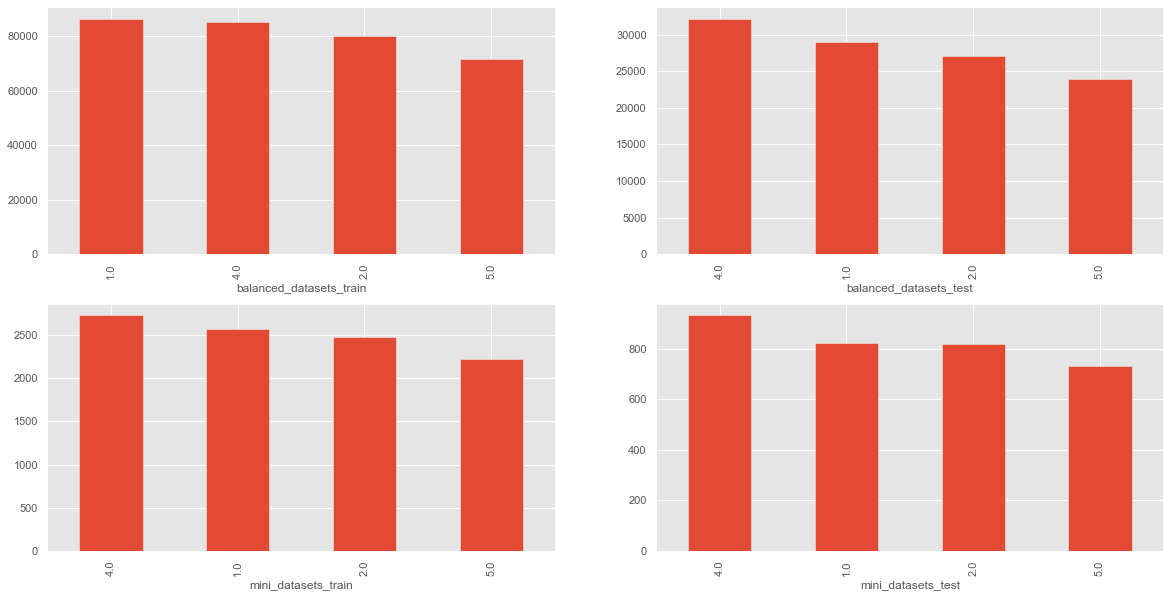

In [37]:
# plt.rcParams["figure.figsize"] = (10,10)
plt.style.use('ggplot')
fig, axes = plt.subplots(2,2, figsize=(20, 10))

balanced_datasets_train['activityID'].value_counts().plot(ax=axes[0,0], kind='bar', grid=True)
balanced_datasets_test['activityID'].value_counts().plot(ax=axes[0,1], kind='bar', grid=True)
mini_datasets_train['activityID'].value_counts().plot(ax=axes[1,0], kind='bar', grid=True)
mini_datasets_test['activityID'].value_counts().plot(ax=axes[1,1], kind='bar', grid=True)
#------------------------------------------------------------------------
axes[0,0].set_xlabel('balanced_datasets_train')
axes[0,1].set_xlabel('balanced_datasets_test')
axes[1,0].set_xlabel('mini_datasets_train')
axes[1,1].set_xlabel('mini_datasets_test')

Text(0.5, 0, 'mini_datasets_test')

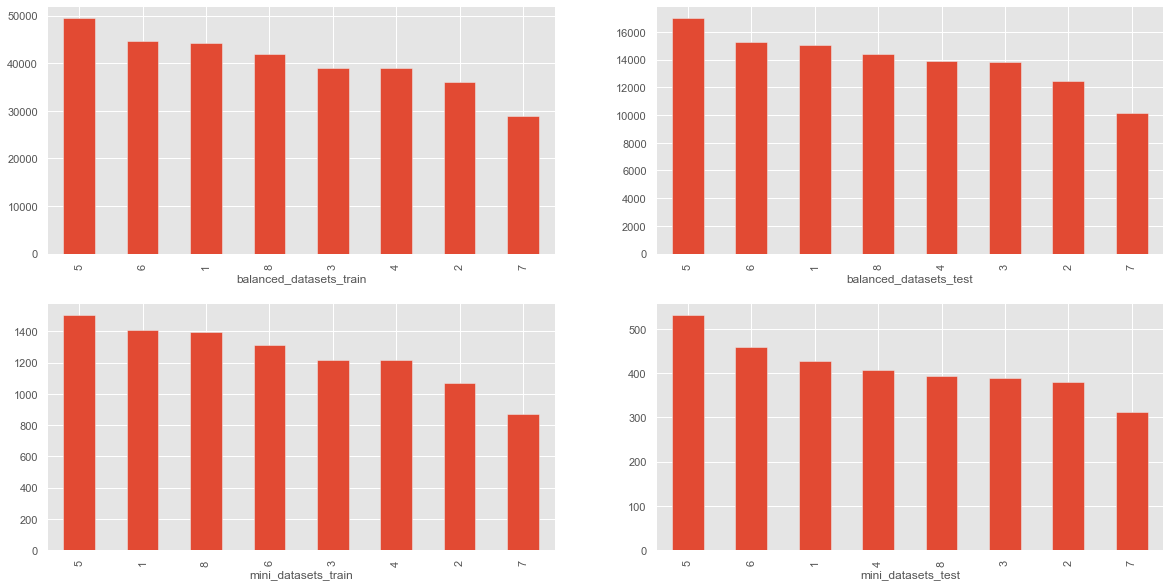

In [38]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2,2, figsize=(20, 10))

balanced_datasets_train['person'].value_counts().plot(ax=axes[0,0], kind='bar', grid=True)
balanced_datasets_test['person'].value_counts().plot(ax=axes[0,1], kind='bar', grid=True)
mini_datasets_train['person'].value_counts().plot(ax=axes[1,0], kind='bar', grid=True)
mini_datasets_test['person'].value_counts().plot(ax=axes[1,1], kind='bar', grid=True)
#------------------------------------------------------------------------
axes[0,0].set_xlabel('balanced_datasets_train')
axes[0,1].set_xlabel('balanced_datasets_test')
axes[1,0].set_xlabel('mini_datasets_train')
axes[1,1].set_xlabel('mini_datasets_test')

In [39]:
balanced_data_y=balanced_datasets_train.iloc[:,-1]
balanced_data_x=balanced_datasets_train.iloc[:,:-2]
data_y=datasets_train.iloc[:,-1]
data_x=datasets_train.iloc[:,:-2]
mini_data_y=mini_datasets_train.iloc[:,-1]
mini_data_x=mini_datasets_train.iloc[:,:-2]

In [40]:

pca = PCA(n_components = 2)
PCA_X_train = pca.fit_transform(data_x)
PCA_balanced_X_train = pca.fit_transform(balanced_data_x)
PCA_mini_X_train = pca.fit_transform(mini_data_x)

#### from the below scatter plot we vasulize the data in scatter plot  before and after the balancing and PCA:

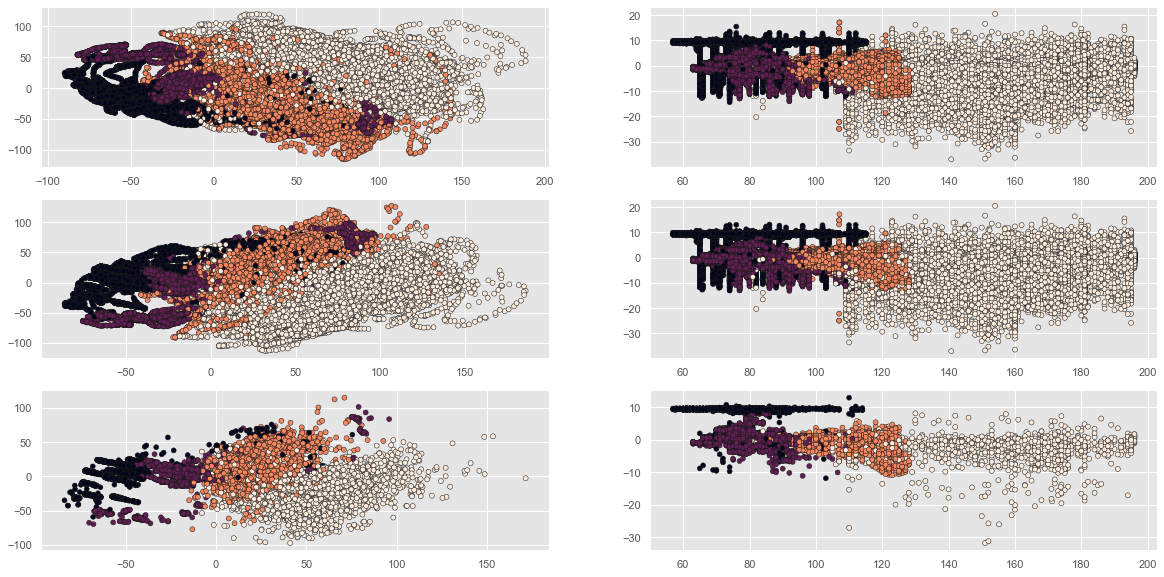

In [41]:
# plt.rcParams["figure.figsize"] = (10,10)

fig, subaxes = plt.subplots(3,2, figsize=(20, 10))

subaxes[0,0].scatter(PCA_X_train[:,0], PCA_X_train[:,1], marker="o", c=data_y, s=25, edgecolor="k")
subaxes[0,1].scatter(datasets_train['heart_rate'], datasets_train['IMU_chest_accz_scale16'], marker="o", c=datasets_train['activityID'], s=25, edgecolor="k")
subaxes[1,0].scatter(PCA_balanced_X_train[:,0], PCA_balanced_X_train[:,1], marker="o", c=balanced_data_y, s=25, edgecolor="k")
subaxes[1,1].scatter(balanced_datasets_train['heart_rate'],balanced_datasets_train['IMU_chest_accz_scale16'], marker="o", c=balanced_datasets_train['activityID'], s=25, edgecolor="k")
subaxes[2,0].scatter(PCA_mini_X_train[:,0], PCA_mini_X_train[:,1], marker="o", c=mini_data_y, s=25, edgecolor="k")
subaxes[2,1].scatter(mini_datasets_train['heart_rate'],mini_datasets_train['IMU_chest_accz_scale16'], marker="o", c=mini_datasets_train['activityID'], s=25, edgecolor="k")
#------------------------------------------------------------------------
# axes[0,0].set_xlabel('datasets_train')
# axes[0,1].set_xlabel('datasets_test')
# axes[1,0].set_xlabel('balanced_datasets_train')
# axes[1,1].set_xlabel('balanced_datasets_test')
# axes[2,0].set_xlabel('mini_datasets_train')
# axes[2,1].set_xlabel('mini_datasets_test')


##### -----------------------------------------------------------------------------------------------------------------------------------------

#### final preprocessing step naming the dataframe 

In [42]:
# (1)
X_train = datasets_train[best_feature_name]
y_train = datasets_train['activityID']
X_test = datasets_test[best_feature_name]
y_test = datasets_test['activityID']
# ----------------------------------------
# (2)
balanced_X_train = balanced_datasets_train[best_feature_name]
balanced_y_train = balanced_datasets_train['activityID']
balanced_X_test = balanced_datasets_test[best_feature_name]
balanced_y_test = balanced_datasets_test['activityID']
# -----------------------------------------
# (3)
scaled_X_train = StandardScaler().fit_transform(balanced_X_train)
scaled_y_train = balanced_y_train
scaled_X_test = StandardScaler().fit_transform(balanced_X_test)
scaled_y_test = balanced_y_test
# -------------------------------------------
# (4)
normalize_X_train = normalize(balanced_X_train)
normalize_y_train = balanced_y_train
normalize_X_test = normalize(balanced_X_test)
normalize_y_test = balanced_y_test
# --------------------------------------------
# (5)
#PCA_X_train = PCA(n_components=10).fit_transform(balanced_X_train)
#PCA_y_train = balanced_y_train
#PCA_X_test = PCA(n_components=10).fit_transform(balanced_X_test)
#PCA_y_test = balanced_y_test
# ----------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------
# (6)
mini_X_train = mini_datasets_train[best_feature_name]
mini_y_train = mini_datasets_train['activityID']
mini_X_test = mini_datasets_test[best_feature_name]
mini_y_test = mini_datasets_test['activityID']
# -------------------------------------------
# (7)
mini_scaled_X_train = StandardScaler().fit_transform(mini_X_train)
mini_scaled_y_train = mini_y_train
mini_scaled_X_test = StandardScaler().fit_transform(mini_X_test)
mini_scaled_y_test = mini_y_test
# -------------------------------------------
# (8)
mini_normalize_X_train = normalize(mini_X_train)
mini_normalize_y_train = mini_y_train
mini_normalize_X_test = normalize(mini_X_test)
mini_normalize_y_test = mini_y_test
# --------------------------------------------
# (9)
#mini_PCA_X_train = PCA(n_components=10).fit_transform(mini_X_train)
#mini_PCA_y_train = mini_y_train
#mini_PCA_X_test = PCA(n_components=10).fit_transform(mini_X_test)
#mini_PCA_y_test = mini_y_test


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

## **Saving proccessed data to CSV files, to save running time**

In [43]:
###########################################################################################
# saving the Origional data, where features & classes were reduced into a csv file
##########################################################################################

# traing_data csv file
Pre_processing_train_data = X_train
Pre_processing_train_data['activityID'] = y_train
Pre_processing_train_data.head()

Pre_processing_train_data.to_csv(
    'data_CSV\Pre_processing_train_data.csv', index=False)

# testing_data csv file
Pre_processing_test_data = X_test
Pre_processing_test_data['activityID'] = y_test
Pre_processing_test_data.head()

Pre_processing_test_data.to_csv(
    'data_CSV\Pre_processing_test_data.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\2540998556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pre_processing_train_data['activityID'] = y_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\2540998556.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pre_processing_test_data['activityID'] = y_test


In [44]:

###################################################################################
# saving Balanced data, the Orgional data after balancing into a csv file
###################################################################################

# traing_data csv file
post_processing_train_data = balanced_X_train
post_processing_train_data['activityID'] = balanced_y_train
post_processing_train_data.head()

post_processing_train_data.to_csv(
    'data_CSV\post_processing_train_data.csv', index=False)

# testing_data csv file
post_processing_test_data = balanced_X_test
post_processing_test_data['activityID'] = balanced_y_test
post_processing_test_data.head()

post_processing_test_data.to_csv(
    'data_CSV\post_processing_test_data.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\1634403628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_processing_train_data['activityID'] = balanced_y_train
C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\1634403628.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_processing_test_data['activityID'] = balanced_y_test


In [45]:
#################################################################################################
# saving mini data, a small sample of balanced data that has the same propotions into svs file
################################################################################################

# traing_data csv file
mini_train_data = mini_X_train
mini_train_data['activityID'] = mini_data_y
mini_train_data.head()

mini_train_data.to_csv('mini_train_data.csdata_CSV', index=False)

# testing_data csv file
mini_test_data = mini_X_test
mini_test_data['activityID'] = mini_y_test
mini_test_data.head()

mini_test_data.to_csv('data_CSV\mini_test_data.csv', index=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\2383608571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_train_data['activityID'] = mini_data_y
C:\Users\DELL\AppData\Local\Temp\ipykernel_7964\2383608571.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_test_data['activityID'] = mini_y_test
